<a href="https://colab.research.google.com/github/geethikaprasad13/AIML_Projects_and_Lab/blob/main/AIML_Implementing_forward_propagation_and_back_propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import torch.nn as nn

In [15]:
from sklearn import datasets
from sklearn import preprocessing
iris = datasets.load_iris()
x = torch.tensor(preprocessing.normalize(iris.data[:, :2]), dtype=torch.float)
y = torch.tensor(iris.target.reshape(-1, 1), dtype=torch.float)

In [16]:
torch.manual_seed(2)

In [17]:
print(x.size())
print(y.size())

torch.Size([150, 2])
torch.Size([150, 1])


In [19]:
x = x[:y[y < 2].size()[0]]
y = y[:y[y < 2].size()[0]]

In [20]:
print(x.size())
print(y.size())

torch.Size([100, 2])
torch.Size([100, 1])


In [21]:
print(torch.randn(2, 32).size())

torch.Size([2, 32])


In [22]:
class FNN(nn.Module):
    def __init__(self, ):
        super().__init__()

        self.input_dim = 2
        self.hidden_dim = 32
        self.output_dim = 1

        self.learning_rate = 0.001

        self.w1 = torch.randn(self.input_dim, self.hidden_dim)

        self.w2 = torch.randn(self.hidden_dim, self.output_dim)

    def sigmoid(self, s):
        return 1 / (1 + torch.exp(-s))

    def sigmoid_first_order_derivative(self, s):
        return s * (1 - s)

    def forward(self, x):
        self.y1 = torch.matmul(x, self.w1)

        self.y2 = self.sigmoid(self.y1)

        self.y3 = torch.matmul(self.y2, self.w2)

        y4 = self.sigmoid(self.y3)
        return y4

    def backward(self, x, l, y4):
        self.dC_dy4 = y4 - l

        self.dy4_dy3 = self.sigmoid_first_order_derivative(y4)
        self.dy3_dw2 = self.y2

        self.y4_delta = self.dC_dy4 * self.dy4_dy3

        self.dC_dw2 = torch.matmul(torch.t(self.dy3_dw2), self.y4_delta)

        self.dy3_dy2 = self.w2
        self.dy2_dy1 = self.sigmoid_first_order_derivative(self.y2)

        self.y2_delta = torch.matmul(self.y4_delta, torch.t(self.dy3_dy2)) * self.dy2_dy1

        self.dC_dw1 = torch.matmul(torch.t(x), self.y2_delta)

        self.w1 -= self.learning_rate * self.dC_dw1
        self.w2 -= self.learning_rate * self.dC_dw2

    def train(self, x, l):
        y4 = self.forward(x)

        self.backward(x, l, y4)

In [23]:
model = FNN()

loss_lst = []

num_epochs = 101

for epoch in range(num_epochs):
    y_hat = model(x)

    cross_entropy_loss = -(y * torch.log(y_hat) + (1 - y) * torch.log(1 - y_hat))

    mean_cross_entropy_loss = torch.mean(cross_entropy_loss).detach().item()

    if epoch % 20 == 0:
        print('Epoch {} | Loss: {}'.format(epoch, mean_cross_entropy_loss))
    loss_lst.append(mean_cross_entropy_loss)

    model.train(x, y)

Epoch 0 | Loss: 0.9228230118751526
Epoch 20 | Loss: 0.6966761946678162
Epoch 40 | Loss: 0.6714915633201599
Epoch 60 | Loss: 0.6686137318611145
Epoch 80 | Loss: 0.666690468788147
Epoch 100 | Loss: 0.6648104190826416


<Axes: >

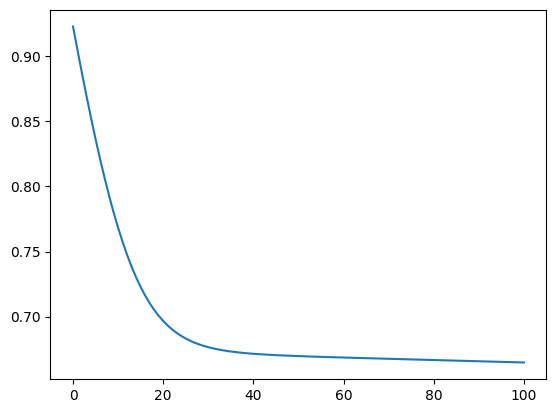

In [24]:
import pandas as pd
%matplotlib inline
pd.Series(loss_lst).plot()